<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dan,-Zuritia-and-Berding-datasets" data-toc-modified-id="Dan,-Zuritia-and-Berding-datasets-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Dan, Zuritia and Berding datasets</a></span></li><li><span><a href="#Visualize-differentials" data-toc-modified-id="Visualize-differentials-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Visualize differentials</a></span></li></ul></div>

In [1]:
# This block is just for importing the necessary libraries.  
import os
from collections import defaultdict
# Numerical libraries
import pandas as pd
import numpy as np
import biom
import arviz as az
from scipy.spatial.distance import euclidean
# Plotting libraries
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as mpatches
import seaborn as sns
from matplotlib_venn import venn2, venn3
# custom utility and plotting functions
from util import (extract_differentials, select_features, 
                  get_genomic_data, collapse_transcripts, 
                  aggregate_pathways,
                  ranking, btest, log_pvalue, read_kegg_dict,
                  ilr_transform_differentials,
                  rename_clades, create_projection,
                  match_all_differentials)
from plot import (rankplot, networkplot, vectorplot)
import random

# directory paths
dan_directory = '../sfari/data/sra/Dan2020'
zurita_directory = '../sfari/data/sra/Zurita2019'
berding_directory = '../sfari/data/sra/Berding2020'

results_dir = '../results'
kegg_dir = f'{results_dir}/kegg'
hsa_dir = f'{results_dir}/hsa_kegg'
np.random.seed(0)
random.seed(0)
%matplotlib inline

# Dan, Zuritia and Berding datasets

In [2]:
# load 16S, whole genome shotgun and RNAseq data
posterior_name = os.path.join('age_sex_matched_posterior.nc')
dan_fname = f'{dan_directory}/{posterior_name}'
zurita_fname = f'{zurita_directory}/{posterior_name}'
berding_fname = f'{berding_directory}/{posterior_name}'
dan_diffs = extract_differentials(dan_fname)
zurita_diffs = extract_differentials(zurita_fname)
berding_diffs = extract_differentials(berding_fname)

# Compute statistical tests for each data layer
# Here, we will only focus on the top 5% of the features
dan_stats = ranking(dan_diffs, reference_percentile=95)
zurita_stats = ranking(zurita_diffs, reference_percentile=95)
berding_stats = ranking(berding_diffs, reference_percentile=95)

# Visualize differentials

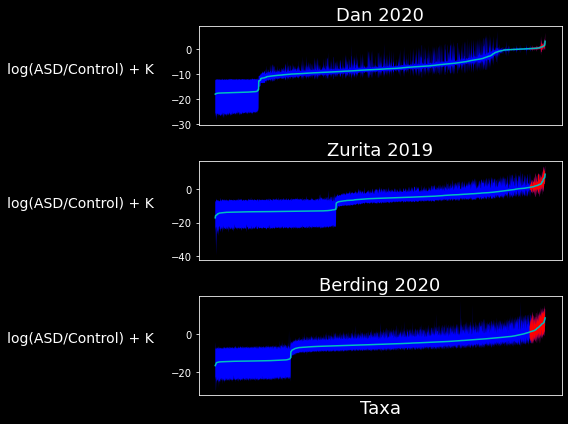

In [9]:
# Plot the log-fold changes
with plt.style.context('dark_background'):
    fig, ax = plt.subplots(3, 1, figsize=(8, 6))
    rankplot(dan_stats, ax[0])
    ax[0].set_title('Dan 2020', 
                    fontsize=18)
    ax[0].set_xticks([])

    rankplot(zurita_stats, ax[1])
    ax[1].set_title('Zurita 2019', 
                    fontsize=18)
    ax[1].set_xticks([])

    rankplot(berding_stats, ax[2])
    ax[2].set_title('Berding 2020', 
                    fontsize=18)
    ax[2].set_xticks([])
    ax[2].set_xlabel('Taxa', fontsize=18)
    plt.tight_layout()